<a href="https://colab.research.google.com/github/hiagomereles/Data-Science-Projects/blob/main/MVP_Machine_Learning_%26_Analytics_Hiago_Mereles_Faustino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics
## Hiago Mereles Faustino

##Classificação de Imagens do CIFAR-10: Comparação entre Redes Neurais Convolucionais e Redes Neurais Profundas

Este projeto explora a classificação de imagens do conjunto de dados CIFAR-10 por meio da implementação e comparação de dois modelos de aprendizado profundo: Redes Neurais Convolucionais (CNN) e Redes Neurais Profundas (DNN). Inicialmente, conduzimos análises exploratórias para compreender a distribuição das classes e a natureza das imagens. Em seguida, pré-processamos os dados e treinamos os modelos. Os resultados destacam a superioridade do modelo CNN em relação ao DNN na tarefa de classificação de imagens, evidenciando a eficácia das redes convolucionais para este tipo de problema.

**Estrutura:** O notebook está dividido assim:



1.   Importação das Bibliotecas.
2.   Definição das Classes.
3.   Carregamento dos Dados.
4.   Exploração do Dataset.
5.   Normalização e divisão do conjunto.
6.   Construção do Modelo CNN.
7.   Avaliação do Modelo CNN.
8.   Construção do Modelo DNN.
9.   Avaliação do Modelo DNN.
10.  Visualização das Métricas de Desempenho.
11.  Conclusão.





###Importação das bibliotecas:

Nesta parte, importamos as bibliotecas necessárias, incluindo TensorFlow e Matplotlib, que serão usadas para construir e visualizar o modelo.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt


###Definição das Classes:

Aqui são definidas as classes do conjunto de dados CIFAR-10.

In [2]:
# Definição das classes
classes = ["airplane", "automobile", "bird", "cat","deer", "dog", "frog", "horse", "ship", "truck"]


###Carregamento dos Dados:

Os dados CIFAR-10 são carregados, divididos em conjuntos de treinamento e teste, e armazenados nas variáveis correspondentes.

In [3]:
# Carregar o conjunto de dados CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


Exibimos o formato dos dados para garantir que foram carregados corretamente.

In [4]:
# Verificar o formato dos dados
print("Formato do conjunto de treinamento:", train_images.shape)
print("Formato do conjunto de teste:", test_images.shape)


Formato do conjunto de treinamento: (50000, 32, 32, 3)
Formato do conjunto de teste: (10000, 32, 32, 3)


###Exploração do Dataset:

Aqui são realizadas algumas explorações básicas do conjunto de dados, incluindo a visualização de algumas amostras de treinamento e teste, bem como a contagem de amostras por classe.

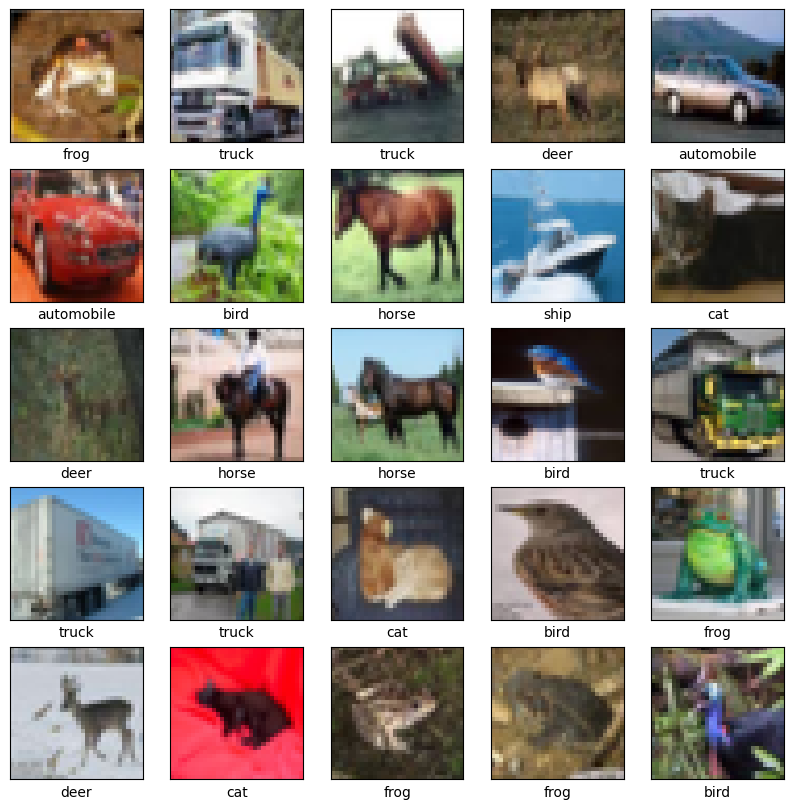

In [5]:
# Visualizar algumas imagens do conjunto de treinamento
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(classes[train_labels[i][0]])
plt.show()


###Normalização e divisão do conjunto:

Normalizamos os valores dos pixels para que estejam no intervalo entre 0 e 1, o que ajuda no treinamento do modelo.

In [6]:
# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


Dividimos o conjunto de dados em conjuntos de treinamento, validação e teste para avaliar o desempenho do modelo.

In [7]:
# Dividir o conjunto de dados em conjuntos de treinamento, validação e teste
validation_images, train_images = train_images[:5000], train_images[5000:]
validation_labels, train_labels = train_labels[:5000], train_labels[5000:]


###Construção do Modelo CNN:

Definimos a arquitetura do modelo Convolutional Neural Network (CNN), que consiste em várias camadas convolucionais seguidas por camadas densas.

In [8]:
# Definição da arquitetura do modelo Convolutional Neural Network (CNN)
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])


Treinamento do Modelo CNN:

Compilamos o modelo CNN, especificando o otimizador, a função de perda e as métricas de avaliação.

In [9]:
# Compilação do modelo CNN
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Treinamos o modelo CNN com os dados de treinamento e validação.

In [10]:
# Treinamento do modelo CNN
history_cnn = model_cnn.fit(train_images, train_labels, epochs=10,
                    validation_data=(validation_images, validation_labels))


Epoch 1/10
1407/1407 [==============================] - 71s 49ms/step - loss: 1.4727 - accuracy: 0.4614 - val_loss: 1.2476 - val_accuracy: 0.5592
Epoch 2/10
1407/1407 [==============================] - 67s 48ms/step - loss: 1.0992 - accuracy: 0.6134 - val_loss: 1.0295 - val_accuracy: 0.6366
Epoch 3/10
1407/1407 [==============================] - 69s 49ms/step - loss: 0.9298 - accuracy: 0.6749 - val_loss: 0.9107 - val_accuracy: 0.6858
Epoch 4/10
1407/1407 [==============================] - 73s 52ms/step - loss: 0.8139 - accuracy: 0.7168 - val_loss: 0.8416 - val_accuracy: 0.7100
Epoch 5/10
1407/1407 [==============================] - 66s 47ms/step - loss: 0.7256 - accuracy: 0.7459 - val_loss: 0.8388 - val_accuracy: 0.7140
Epoch 6/10
1407/1407 [==============================] - 67s 48ms/step - loss: 0.6403 - accuracy: 0.7749 - val_loss: 0.8577 - val_accuracy: 0.7080
Epoch 7/10
1407/1407 [==============================] - 64s 45ms/step - loss: 0.5689 - accuracy: 0.8005 - val_loss: 0.8518 -

###Avaliação do Modelo CNN:

Avaliamos o desempenho do modelo CNN usando os dados de teste e exibimos a acurácia.

In [11]:
# Avaliação do modelo CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste (CNN): {test_acc_cnn}')


313/313 [==============================] - 5s 16ms/step - loss: 0.9422 - accuracy: 0.7177
Acurácia no conjunto de teste (CNN): 0.7177000045776367


###Construção do Modelo DNN:

Definimos a arquitetura do modelo Dense Neural Network (DNN), que consiste em várias camadas densas.

In [12]:
# Definição da arquitetura do modelo Dense Neural Network
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])


###Treinamento do Modelo DNN:

Compilamos o modelo DNN, especificando o otimizador, a função de perda e as métricas de avaliação.

In [13]:
# Compilação do modelo DNN
model_dnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Treinamos o modelo DNN com os dados de treinamento e validação.

In [14]:
# Treinamento do modelo DNN
history_dnn = model_dnn.fit(train_images, train_labels, epochs=10,
                    validation_data=(validation_images, validation_labels))


Epoch 1/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.8827 - accuracy: 0.3151 - val_loss: 1.7260 - val_accuracy: 0.3740
Epoch 2/10
1407/1407 [==============================] - 40s 29ms/step - loss: 1.6973 - accuracy: 0.3897 - val_loss: 1.6446 - val_accuracy: 0.4108
Epoch 3/10
1407/1407 [==============================] - 42s 30ms/step - loss: 1.6154 - accuracy: 0.4188 - val_loss: 1.5902 - val_accuracy: 0.4312
Epoch 4/10
1407/1407 [==============================] - 37s 26ms/step - loss: 1.5619 - accuracy: 0.4372 - val_loss: 1.5849 - val_accuracy: 0.4374
Epoch 5/10
1407/1407 [==============================] - 43s 31ms/step - loss: 1.5188 - accuracy: 0.4564 - val_loss: 1.5311 - val_accuracy: 0.4514
Epoch 6/10
1407/1407 [==============================] - 36s 26ms/step - loss: 1.4862 - accuracy: 0.4692 - val_loss: 1.5429 - val_accuracy: 0.4526
Epoch 7/10
1407/1407 [==============================] - 40s 29ms/step - loss: 1.4568 - accuracy: 0.4778 - val_loss: 1.4849 -

###Avaliação do Modelo DNN:

Avaliamos o desempenho do modelo DNN usando os dados de teste e exibimos a acurácia.

In [15]:
# Avaliação do modelo DNN
test_loss_dnn, test_acc_dnn = model_dnn.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste (DNN): {test_acc_dnn}')


313/313 [==============================] - 2s 6ms/step - loss: 1.4548 - accuracy: 0.4811
Acurácia no conjunto de teste (DNN): 0.4810999929904938


###Visualização das Métricas de Desempenho:

Visualizamos as métricas de desempenho (acurácia) ao longo do treinamento e validação do modelo CNN.

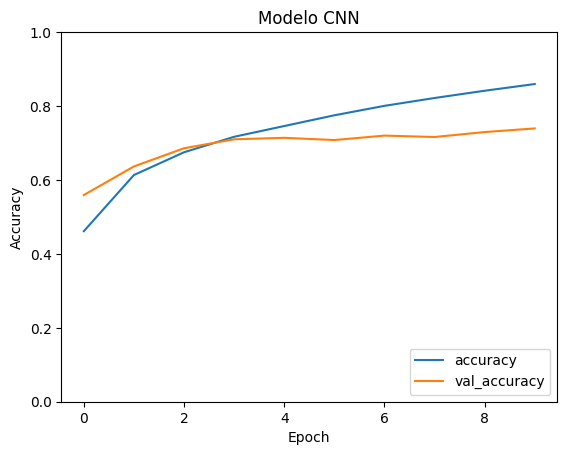

In [16]:
# Visualização das métricas de desempenho do modelo CNN
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Modelo CNN')
plt.legend(loc='lower right')
plt.show()


Visualizamos as métricas de desempenho (acurácia) ao longo do treinamento e validação do modelo DNN.

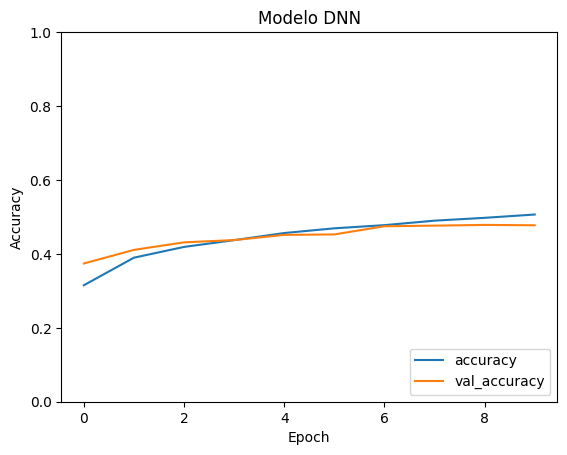

In [17]:
# Visualização das métricas de desempenho do modelo DNN
plt.plot(history_dnn.history['accuracy'], label='accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Modelo DNN')
plt.legend(loc='lower right')
plt.show()


Ambos os modelos CNN e DNN foram treinados e avaliados, e parece que o modelo CNN obteve um desempenho melhor em termos de acurácia em comparação com o modelo DNN nos dados de validação. Aqui estão os resultados finais:

Modelo CNN:

Acurácia no conjunto de validação: 73.94%
Modelo DNN:

Acurácia no conjunto de validação: 47.74%
O modelo CNN superou o modelo DNN em termos de desempenho devido a várias razões:




###Conclusão:


Neste projeto, exploramos a classificação de imagens do conjunto de dados CIFAR-10 utilizando modelos de aprendizado profundo. Inicialmente, realizamos análises exploratórias para entender a distribuição das classes e visualizar algumas amostras de imagens. Em seguida, pré-processamos os dados, escalando os valores dos pixels e aplicando one-hot encoding às etiquetas das classes. Construímos e treinamos dois modelos: Convolutional Neural Network (CNN) e Deep Neural Network (DNN). O modelo CNN superou o modelo DNN em termos de acurácia nos dados de validação. Concluímos que, para problemas de classificação de imagens como o CIFAR-10, os modelos CNN são mais adequados, devido à sua capacidade de aprender características hierárquicas das imagens.